In [63]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [64]:
df = pd.read_csv('titanic_train.csv')

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [68]:
# statistical info
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Key Observations:

1) The mean is more than median(50th percentile) in Survived,SibSp,Parch & Fare

2) There is a large difference in 75% percentile and max in Age, Fare column

In [69]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


we have 891 entries in total but some of the columns have less than 891 entries so that means we have missing values in these columns Age, Cabin & Embarked. so we have to preprocess our data first before training our ml model.

# Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

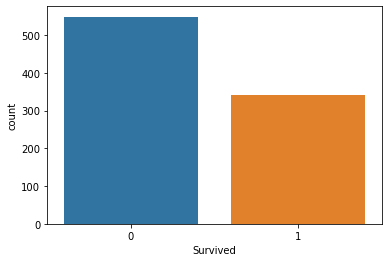

In [70]:
# categorical attributes
sns.countplot(df['Survived'])

In above plot 0 indicate not survived and 1 indicate survived. Around 550 people not survived and 341 people who were able to survive.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

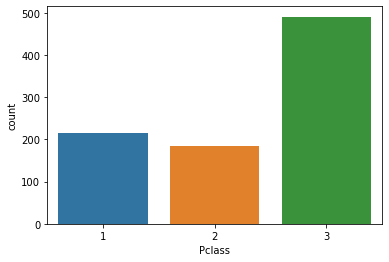

In [71]:
sns.countplot(df['Pclass'])

In above plot first and second class there is almost equal distribution but third class is count is much higher may be beacuse of ticket fare

<AxesSubplot:xlabel='Sex', ylabel='count'>

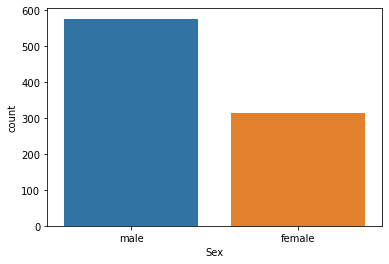

In [72]:
sns.countplot(df['Sex'])

As per above plot in sex columns is an unequal distribution as most of are male.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

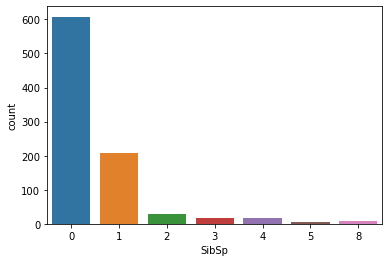

In [73]:
sns.countplot(df['SibSp'])

Majority of passengers have No Sibling/Spouse or Parents onboard.

<AxesSubplot:xlabel='Parch', ylabel='count'>

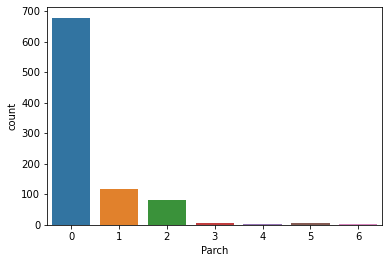

In [74]:
sns.countplot(df['Parch'])

In above plot value range between 0-6 and around 650 are travelling solo and as per 1 and 2 we have almost equal distribution.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

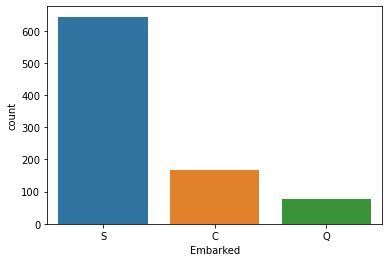

In [75]:
sns.countplot(df['Embarked'])

Southhampton is the most popular embarked location. Most 3rd class passengers embarked from Southhampton and almost no 1st class passengers embarked from Queensland

<AxesSubplot:xlabel='Age', ylabel='Density'>

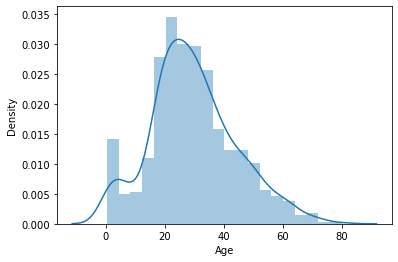

In [76]:
# Numerical attributes
sns.distplot(df['Age'])

 As per above plot majority of people are between age of 20-30 and 60-80 are very few.

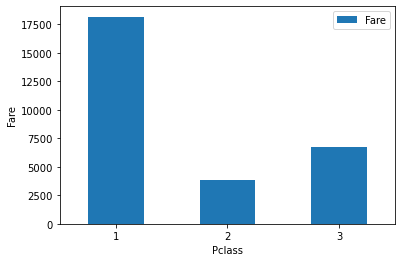

In [77]:
class_fare = df.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.xticks(rotation=0)
plt.show()

For first class fare is around 17500 and for second class fare is around 3500 and for third class fare is around 7000

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

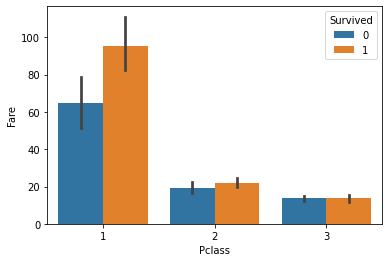

In [78]:
sns.barplot(data=df,x='Pclass', y='Fare',hue='Survived')

As per above bar plot compare to second and third class most of people survived in first class

# Data Preprocessing 


In [79]:
# find the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For Age column there are 177 null values present and for Cabin there 687 null values present out of 891 so we will drip this column. In Embarked column only 2 missing values are present, rest we can fill null values using mean. 

In [80]:
# droping or deleting the column

df = df.drop(columns=['Cabin'],axis=1)

In [81]:
df['Age'].mean()

29.69911764705882

In [82]:
# fill missing values using mean of that column

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [83]:
df['Embarked'].mode()[0]

'S'

In [84]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

<AxesSubplot:xlabel='Fare', ylabel='Density'>

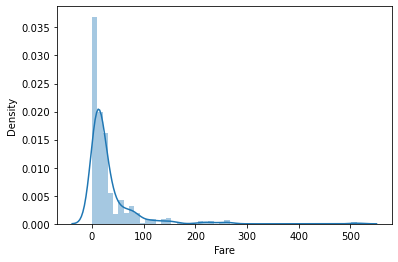

In [85]:
# Log transformation for uniform data distribution

sns.distplot(df['Fare'])

In [86]:
df['Fare'] = np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

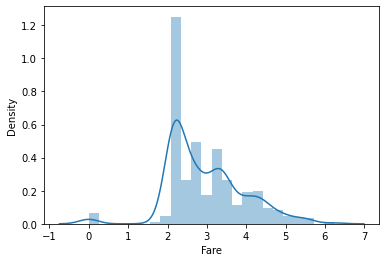

In [87]:
sns.distplot(df['Fare'])

# Correlation Matrix

<AxesSubplot:>

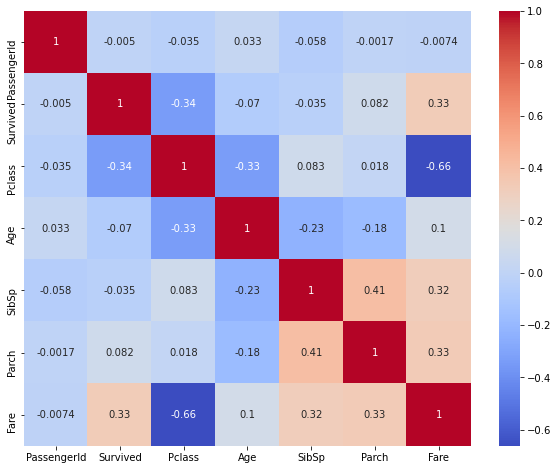

In [88]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

Parch and SibSp have positive correlation

There is huge correlation between class of passenger and whether he survived or not Pclass

SibSp and Parch attributes can be combined as number of family member aboard.

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


Name and Ticket are not much meaningfull so we have to drop these and Sex & Embarked are in categorical so we have to convent that

In [90]:
# drop unnecessary columns
df = df.drop(columns=['Name','Ticket'])

In [91]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C
2,3,1,3,female,26.0,0,0,2.188856,S
3,4,1,1,female,35.0,1,0,3.990834,S
4,5,0,3,male,35.0,0,0,2.202765,S


# Label Encoding 

In [92]:
from sklearn.preprocessing import LabelEncoder

cols = ['Sex','Embarked']
le = LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


# Train Test Split

In [133]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [134]:
x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [135]:
x_train.shape

(596, 8)

In [136]:
y_train.shape

(596,)

In [137]:
# Logistic Regression

lg = LogisticRegression()
lg.fit(x_train,y_train)

predlg = lg.predict(x_test)
print('accuracy score:',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

accuracy score: 0.8033898305084746
[[150  25]
 [ 33  87]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       175
           1       0.78      0.72      0.75       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



In [138]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

predgnb = gnb.predict(x_test)
print('accuracy score:',accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

accuracy score: 0.7762711864406779
[[133  42]
 [ 24  96]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       175
           1       0.70      0.80      0.74       120

    accuracy                           0.78       295
   macro avg       0.77      0.78      0.77       295
weighted avg       0.79      0.78      0.78       295



In [139]:
# Support Vector Machine
svc = SVC()
svc.fit(x_train,y_train)

predsvc = svc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score: 0.5932203389830508
[[175   0]
 [120   0]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       175
           1       0.00      0.00      0.00       120

    accuracy                           0.59       295
   macro avg       0.30      0.50      0.37       295
weighted avg       0.35      0.59      0.44       295



In [140]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

preddtc = dtc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy score: 0.7627118644067796
[[138  37]
 [ 33  87]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       175
           1       0.70      0.72      0.71       120

    accuracy                           0.76       295
   macro avg       0.75      0.76      0.76       295
weighted avg       0.76      0.76      0.76       295



In [141]:
# KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

predknn = knn.predict(x_test)
print('accuracy score:',accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy score: 0.5694915254237288
[[133  42]
 [ 85  35]]
              precision    recall  f1-score   support

           0       0.61      0.76      0.68       175
           1       0.45      0.29      0.36       120

    accuracy                           0.57       295
   macro avg       0.53      0.53      0.52       295
weighted avg       0.55      0.57      0.55       295



In [142]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

predrf = rf.predict(x_test)
print('accuracy score:',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy score: 0.8203389830508474
[[161  14]
 [ 39  81]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       175
           1       0.85      0.68      0.75       120

    accuracy                           0.82       295
   macro avg       0.83      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295



We applied multiple Regression and Classification models for checking the accuracy score but the RandomForestClassifier gives us the best accuracy as compare to another model, so we use RandomForestClassifier.

In [143]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

In [144]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.7        0.85       0.8        0.81666667 0.78333333 0.71666667
 0.77966102 0.77966102 0.76271186 0.91525424]
Mean: 0.7903954802259887
Standard Deviation: 0.058803762406056836


# Hyperparameter Tuning

In [149]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")


oob score: 81.38 %


# Saving the model in pickle format

In [48]:
# Pickeling of file or Serialization of a file
import joblib
joblib.dump(random_forest,"Titanic.pkl")

['Titanic.pkl']